 # Python Data Manipulation: FAA Dataset

## Initial Data Manipulation using FAA_AIDS_00_19.csv

In [630]:
import pandas as pd
import numpy as np

In [631]:
data=pd.read_csv('FAA_AIDS_00_19.csv')

### Explore First 10 Rows of Dataset

In [632]:
data.head(10)

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Aircraft Registration Nbr,Total Fatalities,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model
0,20000101000049I,01JAN00,SCAPPOOSE,OR,SCAPPOOSE INDUSTRIAL AIRPARK,INCIDENT,MINOR,NORMAL CRUISE,BEECH,95,...,2051C,0,0,CONT,IO360*,IO360,2,NaN,,
1,20000101000179I,01JAN00,DENVER,CO,ROCKY MOUNTAIN METROPOLITAN,INCIDENT,NaN,NORMAL CRUISE,CESSNA,T210,...,732LX,0,0,NaN,NaN,NaN,1,PRIVATE PILOT,2200,90
2,20000101001159I,01JAN00,BINGHAMTON,NY,GREATER BINGHAMTON/EDWIN A LINK FIELD,INCIDENT,NaN,CLIMB,DE HAVILLAND,DHC8,...,841EX,0,0,NaN,NaN,NaN,2,NaN,,
3,20000102000129I,02JAN00,PITTSBURGH,PA,PITTSBURGH INTL,INCIDENT,NaN,FINAL APPROACH,BAE,JETSTREAM3100,...,844JS,0,0,NaN,NaN,NaN,2,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,2795,201
4,20000102000169I,02JAN00,KANSAS CITY,MO,KANSAS CITY INTL,INCIDENT,NaN,FINAL APPROACH,BOEING,737,...,322DL,0,0,NaN,NaN,NaN,2,NaN,,
5,20000102000199I,02JAN00,GEORGETOWN,CA,GEORGETOWN,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,337,...,2225X,0,0,NaN,NaN,NaN,2,STUDENT,100,100
6,20000102000349I,02JAN00,KILA,MT,NaN,INCIDENT,MINOR,CLIMB,BELL,206,...,215KH,0,0,NaN,NaN,NaN,1,COMMERCIAL PILOT,3000,400
7,20000102000699I,02JAN00,SILVER CITY,NM,GRANT COUNTY,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,NON STANDARD,NaN,...,360TV,0,0,CONT,IO360*,IO360,1,PRIVATE PILOT,560,95
8,20000102000949I,02JAN00,BUFFALO,NY,BUFFALO NIAGARA INTL,INCIDENT,NaN,NORMAL CRUISE,BOEING,737,...,209US,0,0,PWA,JT8D,JT8,2,NaN,,
9,20000102001019I,02JAN00,GAITHERSBURG,MD,MONTGOMERY COUNTY AIRPARK,INCIDENT,MINOR,TAKEOFF GROUND ROLL,CESSNA,150,...,3979U,0,0,CONT,O200A,O200,1,PRIVATE PILOT,167,145


### Why are (PIC Flight Time Total Hrs) & (PIC Flight Time Total Make-Model) not filling blanks with NaN?

#### ***CSV inspection, strip(), or pd.to_numeric in pandas is integral in minigating data manipulation headaches. Sometimes datasets can take-on irregular cell features within .csv files where cells contain invisible spaces.***

### Must Change Data Type or Run the code below:

In [633]:
# Apply strip() to remove spaces from blank cells
# data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with NaN
# data.replace('', np.nan, inplace=True)

# data.head()

### Identify Data Types 

In [634]:
# Display data types of columns
data_types = data.dtypes

print(data_types)

AIDS Report Number                  object
Local Event Date                    object
Event City                          object
Event State                         object
Event Airport                       object
Event Type                          object
Aircraft Damage                     object
Flight Phase                        object
Aircraft Make                       object
Aircraft Model                      object
Aircraft Series                     object
Primary Flight Type                 object
Flight Conduct Code                 object
Flight Plan Filed Code              object
Aircraft Registration Nbr           object
Total Fatalities                    object
Total Injuries                      object
Aircraft Engine Make                object
Aircraft Engine Model               object
Engine Group Code                   object
Nbr of Engines                      object
PIC Certificate Type                object
PIC Flight Time Total Hrs           object
PIC Flight 

In [635]:
# Convert object column to numeric
data['Total Fatalities'] = pd.to_numeric(data['Total Fatalities'], errors='coerce')
data['Total Injuries'] = pd.to_numeric(data['Total Injuries'], errors='coerce')
data['Nbr of Engines'] = pd.to_numeric(data['Nbr of Engines'], errors='coerce')
data['PIC Flight Time Total Hrs'] = pd.to_numeric(data['PIC Flight Time Total Hrs'], errors='coerce')
data['PIC Flight Time Total Make-Model'] = pd.to_numeric(data['PIC Flight Time Total Make-Model'], errors='coerce')



In [636]:
# Display data types of columns
data_types = data.dtypes

# Print the data types
print(data_types)

AIDS Report Number                   object
Local Event Date                     object
Event City                           object
Event State                          object
Event Airport                        object
Event Type                           object
Aircraft Damage                      object
Flight Phase                         object
Aircraft Make                        object
Aircraft Model                       object
Aircraft Series                      object
Primary Flight Type                  object
Flight Conduct Code                  object
Flight Plan Filed Code               object
Aircraft Registration Nbr            object
Total Fatalities                    float64
Total Injuries                      float64
Aircraft Engine Make                 object
Aircraft Engine Model                object
Engine Group Code                    object
Nbr of Engines                      float64
PIC Certificate Type                 object
PIC Flight Time Total Hrs       

### Get Summary Statistics
### Initial Summary Statistics --> top = Most Frequent Entry --> freq = Frequency of Most Frequent Entry (top)
### Ignore Missing Values (for now) --> Familiarize with Frequent Entries

In [637]:
data.describe()

,Total Fatalities,Total Injuries,Nbr of Engines,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model
count,30636.000000,30636.000000,22972.000000,24177.000000,23278.000000
mean,0.006822,0.055099,1.359525,4016.500765,795.614314
std,0.086943,0.592290,0.561009,6120.237865,1833.859391
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,372.000000,42.000000
50%,0.000000,0.000000,1.000000,1495.000000,200.000000
75%,0.000000,0.000000,2.000000,4900.000000,737.750000
max,3.000000,56.000000,4.000000,92591.000000,85215.000000


In [638]:
data.describe(include=[object]) 

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,Aircraft Series,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,PIC Certificate Type
count,30640,30640,29508,30309,26210,30640,26875,30540,28310,28111,28112,15744,30520,16777,30636,17789,17789,7945,25045
unique,30639,7109,4076,62,3709,2,6,73,259,835,614,17,11,7,26730,168,1956,1077,11
top,"""",03JUN00,PITTSBURGH,CA,PITTSBURGH INTL,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,172,NO SERIES EXISTS,PERSONAL,GENERAL OPERATING RULES,UNKNOWN,NONE,LYCOMI,0-320 SERIES,O360,PRIVATE PILOT
freq,2,17,278,3149,252,30638,22094,4375,7365,1637,4974,8105,22756,12144,219,4679,874,878,9473


### Check for Missing Values

### Show # and % of Missing Values In Each Variable

In [639]:
data.isnull().sum().sort_values(ascending=False)

Engine Group Code                   22695
Primary Flight Type                 14896
Flight Plan Filed Code              13863
Aircraft Engine Make                12851
Aircraft Engine Model               12851
Nbr of Engines                       7668
PIC Flight Time Total Make-Model     7362
PIC Flight Time Total Hrs            6463
PIC Certificate Type                 5595
Event Airport                        4430
Aircraft Damage                      3765
Aircraft Model                       2529
Aircraft Series                      2528
Aircraft Make                        2330
Event City                           1132
Event State                           331
Flight Conduct Code                   120
Flight Phase                          100
Total Injuries                          4
Total Fatalities                        4
Aircraft Registration Nbr               4
Local Event Date                        0
Event Type                              0
AIDS Report Number                

In [640]:
null_percentages=(data.isnull().sum()/len(data)).round(2).sort_values(ascending=False)*100
print(null_percentages)

Engine Group Code                   74.0
Primary Flight Type                 49.0
Flight Plan Filed Code              45.0
Aircraft Engine Make                42.0
Aircraft Engine Model               42.0
Nbr of Engines                      25.0
PIC Flight Time Total Make-Model    24.0
PIC Flight Time Total Hrs           21.0
PIC Certificate Type                18.0
Event Airport                       14.0
Aircraft Damage                     12.0
Aircraft Make                        8.0
Aircraft Model                       8.0
Aircraft Series                      8.0
Event City                           4.0
Event State                          1.0
AIDS Report Number                   0.0
Total Injuries                       0.0
Total Fatalities                     0.0
Aircraft Registration Nbr            0.0
Local Event Date                     0.0
Flight Phase                         0.0
Event Type                           0.0
Flight Conduct Code                  0.0
dtype: float64


### Methods to Handle Missing Data

### *Filling Missing Values*

#### Chose median filled due to this data being used for ML model

In [641]:
# data_filled = data.fillna(0) # Fill missing values with 0
# data_mean_filled = data.fillna(data.mean(numeric_only=True).round(1), inplace=True) # Fill with means
data_median_filled = data.fillna(data.median(numeric_only=True).round(1), inplace=True) # Fill with medians

In [642]:
string_columns = data.select_dtypes(include=['object']).columns # String Type Objects
data[string_columns] = data[string_columns].fillna(data[string_columns].mode().iloc[0]) # Fill with columns with mode

### Drop Missing Values

In [643]:
data_cleaned_rows = data.dropna()  # Drops rows with any missing value
# data_cleaned_columns = data.dropna(axis=1)  # Drops columns with any missing value

### Set Missing Value Threshold and Drop Columns

In [644]:
#threshold = 50  # Example threshold of 50%
#columns_to_drop = null_percentages[null_percentages > threshold].index # Identify columns to drop
#data_dropped = data.drop(columns=columns_to_drop)

### Replacing Blank Values

In [645]:
#Replace blank values with NaN
#data.replace('', np.nan, inplace=True)

In [646]:
data.head()

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Aircraft Registration Nbr,Total Fatalities,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model
0,20000101000049I,01JAN00,SCAPPOOSE,OR,SCAPPOOSE INDUSTRIAL AIRPARK,INCIDENT,MINOR,NORMAL CRUISE,BEECH,95,...,2051C,0.0,0.0,CONT,IO360*,IO360,2.0,PRIVATE PILOT,1495.0,200.0
1,20000101000179I,01JAN00,DENVER,CO,ROCKY MOUNTAIN METROPOLITAN,INCIDENT,MINOR,NORMAL CRUISE,CESSNA,T210,...,732LX,0.0,0.0,LYCOMI,0-320 SERIES,O360,1.0,PRIVATE PILOT,2200.0,90.0
2,20000101001159I,01JAN00,BINGHAMTON,NY,GREATER BINGHAMTON/EDWIN A LINK FIELD,INCIDENT,MINOR,CLIMB,DE HAVILLAND,DHC8,...,841EX,0.0,0.0,LYCOMI,0-320 SERIES,O360,2.0,PRIVATE PILOT,1495.0,200.0
3,20000102000129I,02JAN00,PITTSBURGH,PA,PITTSBURGH INTL,INCIDENT,MINOR,FINAL APPROACH,BAE,JETSTREAM3100,...,844JS,0.0,0.0,LYCOMI,0-320 SERIES,O360,2.0,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,2795.0,201.0
4,20000102000169I,02JAN00,KANSAS CITY,MO,KANSAS CITY INTL,INCIDENT,MINOR,FINAL APPROACH,BOEING,737,...,322DL,0.0,0.0,LYCOMI,0-320 SERIES,O360,2.0,PRIVATE PILOT,1495.0,200.0


In [647]:
null_percentages=(data.isnull().sum()/len(data)).round(2).sort_values(ascending=False)*100
print(null_percentages)

AIDS Report Number                  0.0
Local Event Date                    0.0
PIC Flight Time Total Hrs           0.0
PIC Certificate Type                0.0
Nbr of Engines                      0.0
Engine Group Code                   0.0
Aircraft Engine Model               0.0
Aircraft Engine Make                0.0
Total Injuries                      0.0
Total Fatalities                    0.0
Aircraft Registration Nbr           0.0
Flight Plan Filed Code              0.0
Flight Conduct Code                 0.0
Primary Flight Type                 0.0
Aircraft Series                     0.0
Aircraft Model                      0.0
Aircraft Make                       0.0
Flight Phase                        0.0
Aircraft Damage                     0.0
Event Type                          0.0
Event Airport                       0.0
Event State                         0.0
Event City                          0.0
PIC Flight Time Total Make-Model    0.0
dtype: float64


# DATA INFERENCES

### Let's examine Primary Flight Type and PIC Certification Type more in depth

In [648]:
column_to_examine1 = 'Primary Flight Type'  # Replace with the name of the column you want to examine
column_to_examine2 = 'PIC Certificate Type'  # Replace with the name of the column you want to examine

# Get unique values from the chosen column
unique_values1 = data[column_to_examine1].unique()
unique_values2 = data[column_to_examine2].unique()

print("Unique values in", column_to_examine1, ":", unique_values)
print("Unique values in", column_to_examine2, ":", unique_values)

Unique values in Primary Flight Type : ['PERSONAL' 'SUPPLEMENTAL OR COMMERCIAL OPERATOR' 'SCHEDULED AIR CARRIER'
 'INSTRUCTION' 'AIR TAXI (NON-SCHEDULED)' 'OTHER' 'BUSINESS'
 'AIR TAXI COMMUTER (SCHEDULED 5 OR MORE ROUNDTRIPS PER WEEK)' 'EXECUTIVE'
 'INDUSTRIAL/SPECIAL' 'ALL CARGO CARRIERS' 'FOR HIRE' 'AERIAL APPLICATOR'
 'AIR TAXI (SCHEDULED- NOT COMMUTER)' 'ILLEGAL DRUG, STOLEN AIRCRAFT, ETC'
 'AIR TAXI OPERATOR- LARGE AIRCRAFT' 'COMMERCIAL PILOT FLIGHT INSTRUCTOR']
Unique values in PIC Certificate Type : ['PERSONAL' 'SUPPLEMENTAL OR COMMERCIAL OPERATOR' 'SCHEDULED AIR CARRIER'
 'INSTRUCTION' 'AIR TAXI (NON-SCHEDULED)' 'OTHER' 'BUSINESS'
 'AIR TAXI COMMUTER (SCHEDULED 5 OR MORE ROUNDTRIPS PER WEEK)' 'EXECUTIVE'
 'INDUSTRIAL/SPECIAL' 'ALL CARGO CARRIERS' 'FOR HIRE' 'AERIAL APPLICATOR'
 'AIR TAXI (SCHEDULED- NOT COMMUTER)' 'ILLEGAL DRUG, STOLEN AIRCRAFT, ETC'
 'AIR TAXI OPERATOR- LARGE AIRCRAFT' 'COMMERCIAL PILOT FLIGHT INSTRUCTOR']


### What flight type is reported most in the FAA incident dataset?
### What PIC (Pilot in Command) Certification is reported most in the FAA incident dataset?

In [649]:
# Get the most common unique value
most_common_value1 = data[column_to_examine1].value_counts().idxmax()
most_common_value2 = data[column_to_examine2].value_counts().idxmax()

print("Most common value in", column_to_examine1, ":", most_common_value1)
print("Most common value in", column_to_examine2, ":", most_common_value2)

Most common value in Primary Flight Type : PERSONAL
Most common value in PIC Certificate Type : PRIVATE PILOT


### % of PERSONL flight type incidents within the dataset
### % of PRIVATE PIC Cert incidents within the dataset

In [650]:
# Calculate the percentage of the most common value
percentage1 = (data[column_to_examine1].value_counts(normalize=True).loc[most_common_value1]) * 100
percentage2 = (data[column_to_examine2].value_counts(normalize=True).loc[most_common_value2]) * 100

print(f"The most common value '{most_common_value1}' appears in {percentage1:.2f}% of the dataset.")
print(f"The most common value '{most_common_value2}' appears in {percentage2:.2f}% of the dataset.")

The most common value 'PERSONAL' appears in 75.07% of the dataset.
The most common value 'PRIVATE PILOT' appears in 49.18% of the dataset.


# Data Visualization

In [651]:
column_to_visualize = 'Primary Flight Type'

# Calculate unique value percentages
unique_value_percentages = (data[column_to_visualize].value_counts() / len(data)) * 100

### Unique Value % in Primary Flight Type

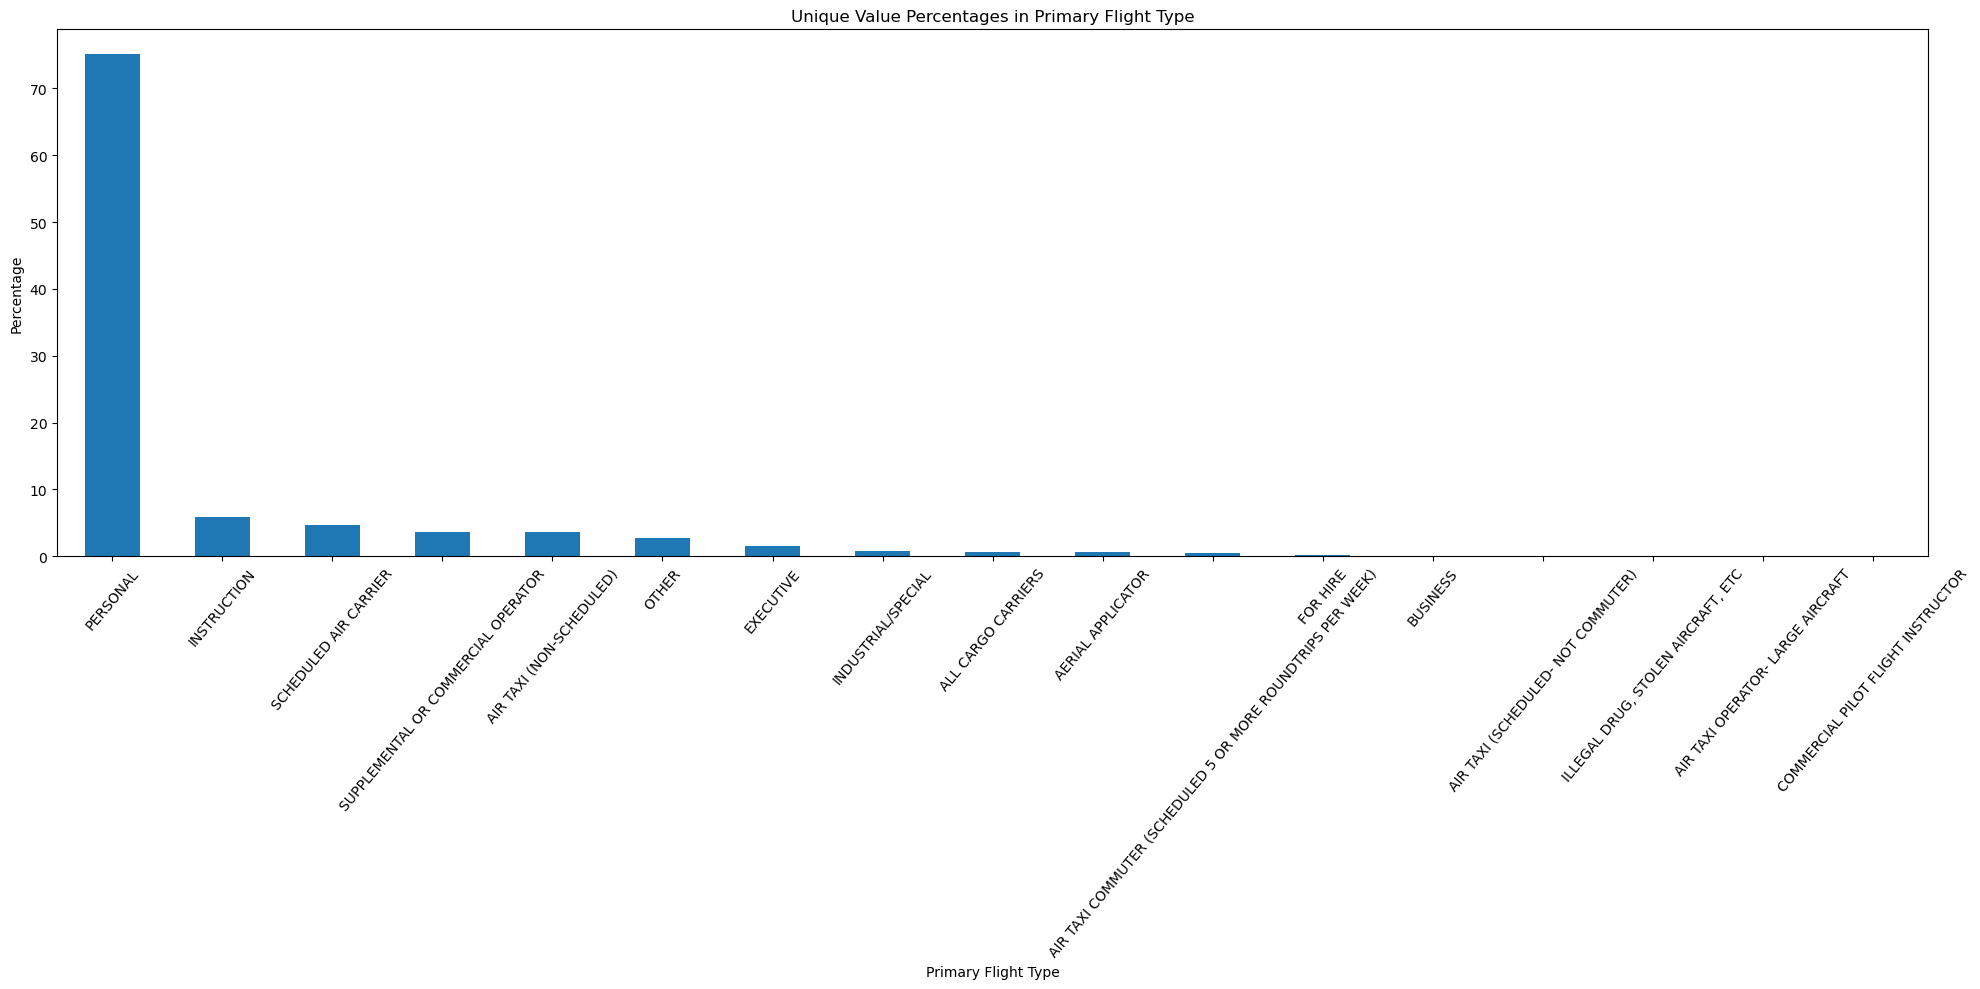

In [652]:
plt.figure(figsize=(20, 10))
unique_value_percentages.plot(kind='bar')
plt.title('Unique Value Percentages in ' + column_to_visualize)
plt.xlabel(column_to_visualize)
plt.ylabel('Percentage')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

### Unique Value % in PIC Certification Type

In [653]:
column_to_visualize2 = 'PIC Certificate Type' 

# Calculate unique value percentages
unique_value_percentages2 = (data[column_to_visualize2].value_counts() / len(data)) * 100

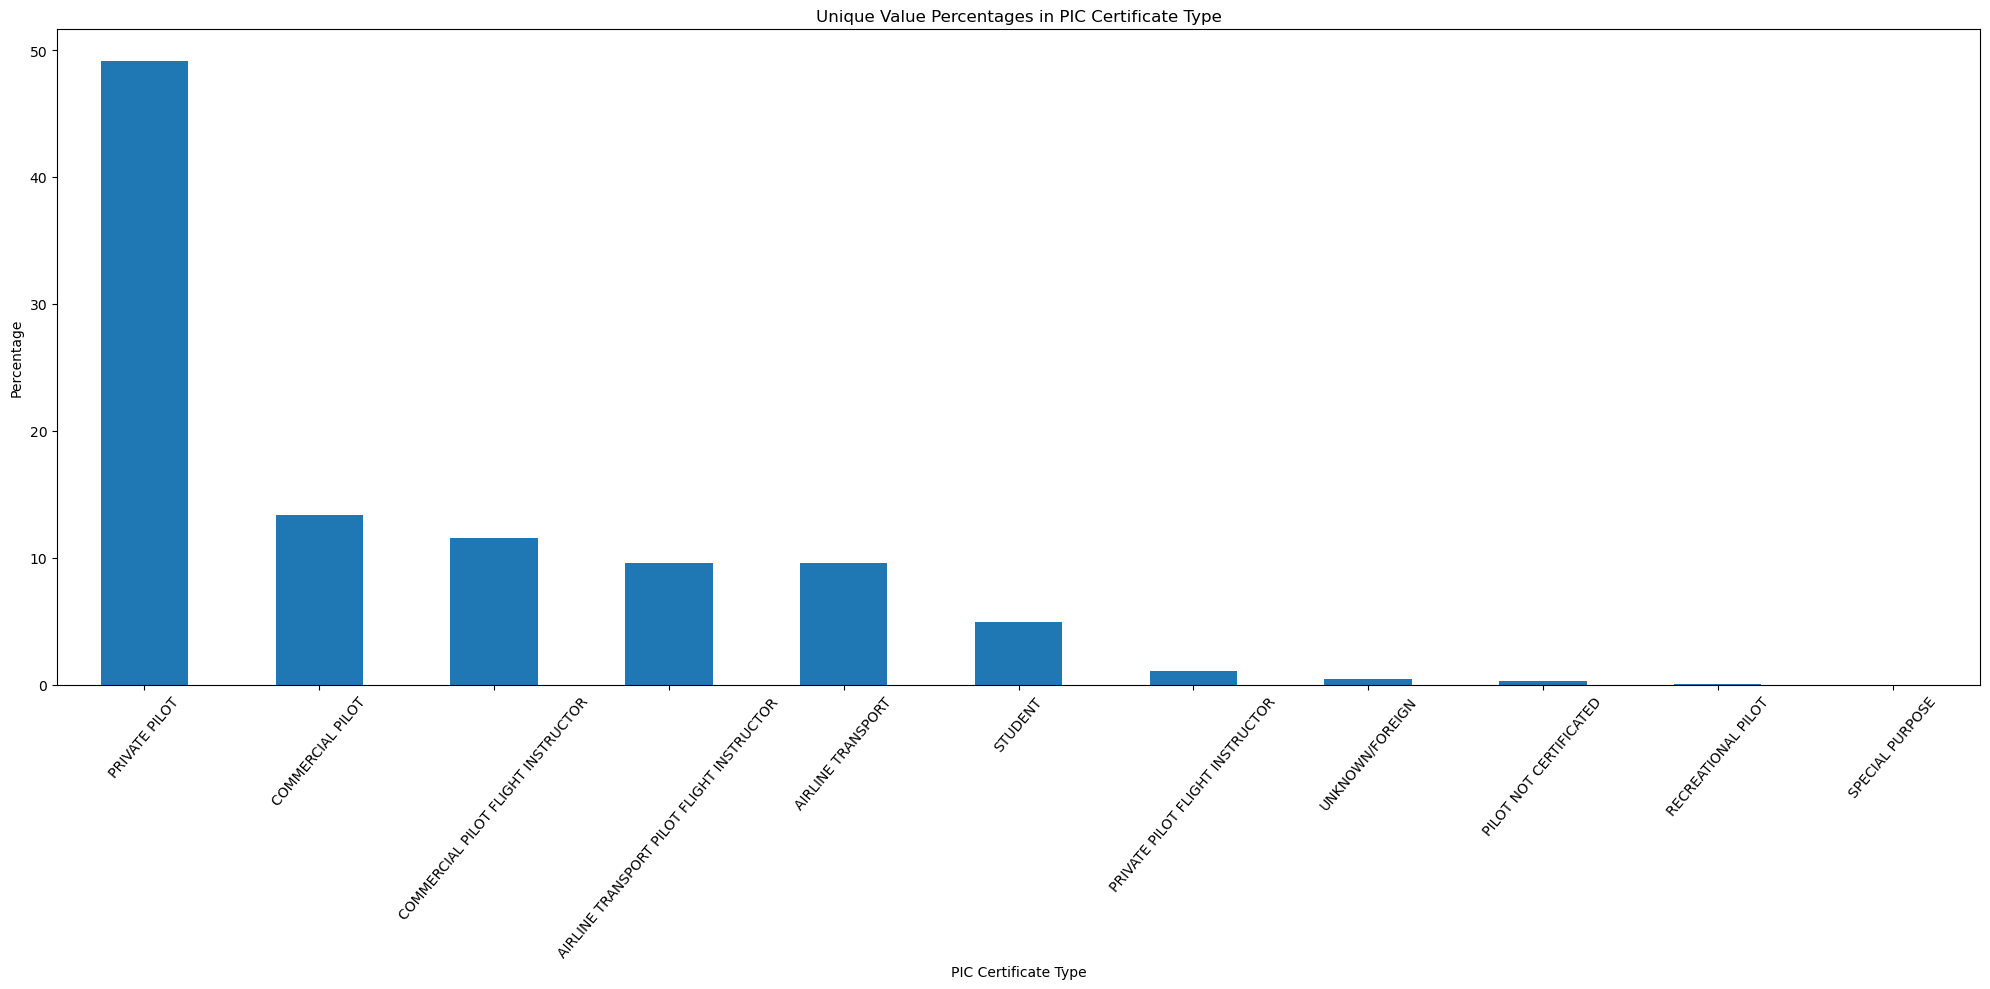

In [654]:
# Create the bar chart
plt.figure(figsize=(20, 10))
unique_value_percentages2.plot(kind='bar')
plt.title('Unique Value Percentages in ' + column_to_visualize2)
plt.xlabel(column_to_visualize2)
plt.ylabel('Percentage')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()